In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine=pd.read_csv('wine.csv')

In [4]:
wine.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [6]:
wine.shape

(178, 14)

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
wine['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [11]:
wine_norm=StandardScaler().fit_transform(wine)
wine_norm

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

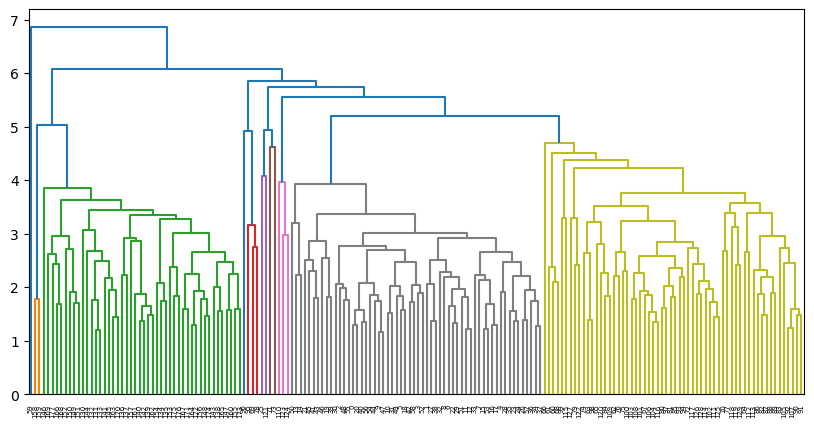

In [12]:
plt.figure(figsize=(10,5))
dendrogram=sch.dendrogram(sch.linkage(wine_norm,method='average'))

In [13]:
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=3)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [14]:
y=pd.DataFrame(hclusters.fit_predict(wine_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    65
2    65
1    48
Name: clustersid, dtype: int64

performing K-Mean clustering before PCA

In [15]:
from sklearn.cluster import KMeans

In [16]:
wcss=[]
for i in range (1,10):
    kmean=KMeans(n_clusters=i,random_state=2)
    kmean.fit(wine_norm)
    wcss.append(kmean.inertia_)

Text(0, 0.5, 'wcss')

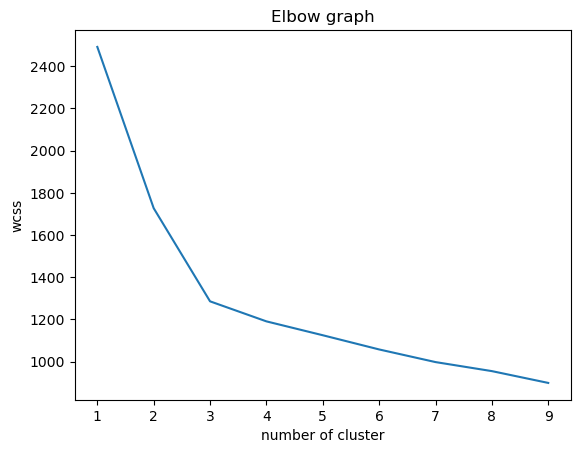

In [17]:
plt.plot(range(1,10),wcss)
plt.title("Elbow graph")
plt.xlabel("number of cluster")
plt.ylabel("wcss")

In [18]:
model=KMeans(n_clusters=3,random_state=2)
model.fit(wine_norm)

KMeans(n_clusters=3, random_state=2)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [19]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [20]:
wine["cluster"]=model.labels_

In [21]:
wine2=wine

In [22]:
wine2["cluster"].value_counts()

0    68
1    61
2    49
Name: cluster, dtype: int64

Applying PCA

In [23]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [24]:
x=wine.iloc[:,1:]
x.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [25]:
x_norm=StandardScaler().fit_transform(x)
x_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893,  0.13281518],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152,  0.13281518],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818,  0.13281518],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37708374],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37708374],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37708374]])

In [26]:
pca=PCA()
pca_value=pca.fit_transform(x_norm)

In [27]:
pca_value

array([[-2.94942686e+00, -2.09973831e+00, -1.15454069e-01, ...,
         5.44527198e-01, -1.98913607e-01,  6.14736791e-03],
       [-2.09887055e+00, -3.63736672e-01, -2.09665573e+00, ...,
         3.95556657e-01, -4.15491337e-01,  2.17587303e-01],
       [-2.24979584e+00, -1.50882483e+00,  1.00538411e+00, ...,
         4.90654480e-04, -5.92087189e-03,  5.67173960e-02],
       ...,
       [ 3.29023047e+00, -2.40362991e+00, -7.41509960e-01, ...,
         6.88744467e-01,  5.79642706e-01, -1.91921890e-01],
       [ 2.94514283e+00, -2.04520521e+00, -3.97476713e-01, ...,
         3.37156319e-01,  1.54308545e-01, -9.80751332e-02],
       [ 3.77661386e+00, -2.20812397e+00,  1.21184232e+00, ...,
        -1.92520188e-01,  1.94356027e-01, -4.70704877e-01]])

In [28]:
pca.explained_variance_ratio_

array([0.35364501, 0.22058971, 0.10411405, 0.06564474, 0.06094552,
       0.04590857, 0.03942812, 0.02513035, 0.02085353, 0.01792963,
       0.01614311, 0.01205524, 0.01129782, 0.00631461])

In [29]:
final_df=pd.concat([wine['Type'],pd.DataFrame(pca_value[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df

,Type,PC1,PC2,PC3
0,1,-2.949427,-2.099738,-0.115454
1,1,-2.098871,-0.363737,-2.096656
2,1,-2.249796,-1.508825,1.005384
3,1,-3.197882,-3.356076,-0.022531
4,1,-0.841602,-0.969921,2.058886
...,...,...,...,...
173,3,3.876456,-1.744915,-0.181914
174,3,3.075530,-1.502692,0.308718
175,3,3.290230,-2.403630,-0.741510
176,3,2.945143,-2.045205,-0.397477


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

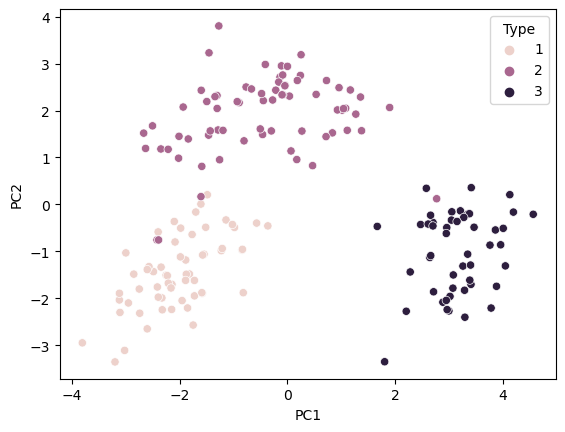

In [30]:
sns.scatterplot(data=final_df, x='PC1', y='PC2', hue='Type')

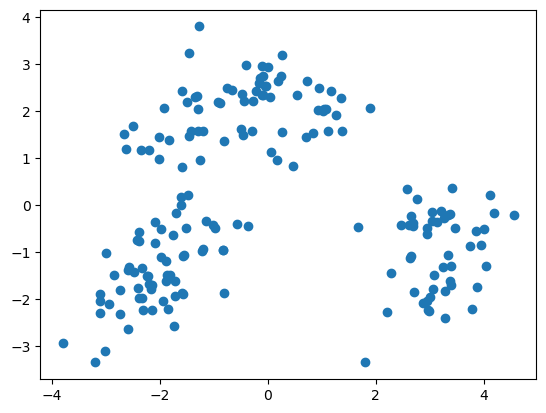

In [31]:
x= pca_value[:,0:1]
y= pca_value[:,1:2]
plt.scatter(x,y)

In [32]:
pca_value=np.cumsum(np.round(pca_value,4)*100)
pca_value

array([-2.9494e+02, -5.0491e+02, -5.1646e+02, ...,  2.7700e+01,
        4.7140e+01,  7.0000e-02])

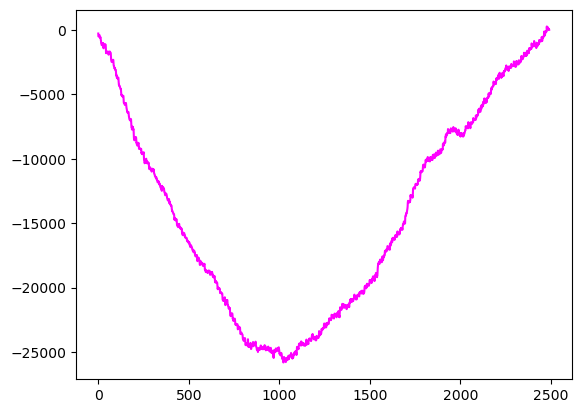

In [33]:
plt.plot(pca_value,color='magenta')